In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('glass.data',header=None,names=["Id number", "RI", "Na", "Mg", "Al", "Si", "K","Ca", "Ba", "Fe", "Type of Glass"])

In [3]:
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
arr_cols = []

In [5]:
for pos in df.columns:
    if(pos!='Id number' and pos!='Type of Glass'):
        arr_cols.append(pos)

In [6]:
df = df.filter(arr_cols, axis=1)

In [7]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters=2,init='random').fit(df)

In [10]:
kmeans.n_clusters

2

In [11]:
kmeans.cluster_centers_

array([[1.51810293e+00, 1.33150000e+01, 3.43884146e+00, 1.32512195e+00,
        7.25837805e+01, 4.98902439e-01, 8.59006098e+00, 5.59146341e-02,
        5.97560976e-02],
       [1.51922640e+00, 1.37124000e+01, 2.10400000e-01, 1.83780000e+00,
        7.28712000e+01, 4.91000000e-01, 1.01604000e+01, 5.65800000e-01,
        4.80000000e-02]])

In [12]:
k = int(input("Type in how many clusters you want: "))

Type in how many clusters you want: 2


In [13]:
import random

In [14]:
arr_points = []

In [15]:
pos_copy=0
while(pos_copy!=k):
    a  = random.randint(0,df.shape[0]-1)
    if(a not in arr_points):
        arr_points.append(a)
    else:
        pos_copy-=1
    pos_copy+=1

In [16]:
arr_points

[75, 193]

In [17]:
arr_values = []

In [18]:
for num in arr_points:
    arr_values.append(df.loc[num].values)

In [19]:
arr_values

[array([ 1.5159, 13.02  ,  3.58  ,  1.51  , 73.12  ,  0.69  ,  7.96  ,
         0.    ,  0.    ]),
 array([ 1.51719, 14.75   ,  0.     ,  2.     , 73.02   ,  0.     ,
         8.53   ,  1.59   ,  0.08   ])]

In [20]:
import numpy as np

In [21]:
distan_store = 0

In [22]:
point_store = []

In [23]:
diction={}

In [24]:
arr_str_val=[]

In [25]:
for pos in range(0,len(arr_values)):
    str_val=''
    for num in range(0,len(arr_values[pos])):
        if(num!=len(arr_values[pos])-1):
            str_val+=str(arr_values[pos][num])+','
        else:
            str_val+=str(arr_values[pos][num])
    diction[str_val]= []
    arr_str_val.append(str_val)

In [26]:
arr_str_val

['1.5159,13.02,3.58,1.51,73.12,0.69,7.96,0.0,0.0',
 '1.51719,14.75,0.0,2.0,73.02,0.0,8.53,1.59,0.08']

In [27]:
diction

{'1.5159,13.02,3.58,1.51,73.12,0.69,7.96,0.0,0.0': [],
 '1.51719,14.75,0.0,2.0,73.02,0.0,8.53,1.59,0.08': []}

In [28]:
def change(arr):
    str_val1=''
    for num in range(0,len(arr)):
        if(num!=len(arr)-1):
            str_val1+=str(arr[num])+','
        else:
            str_val1+=str(arr[num])
    return str_val1

In [29]:
def unchange(string):
    arr=[]
    ans = string.split(',')
    for pos in range(len(ans)):
        arr.append(int(ans[pos]))
    return arr

In [30]:
arr_values

[array([ 1.5159, 13.02  ,  3.58  ,  1.51  , 73.12  ,  0.69  ,  7.96  ,
         0.    ,  0.    ]),
 array([ 1.51719, 14.75   ,  0.     ,  2.     , 73.02   ,  0.     ,
         8.53   ,  1.59   ,  0.08   ])]

In [31]:
for pos in range(0,df.shape[0]):
    distan_store=0
    arr = df.iloc[pos].values
    distan_store=np.Infinity
    print(distan_store)
    point_store=arr
    point_num=[]
    for num in arr_values:
        distance = np.linalg.norm(num - arr)
        print(distance)
        if(distance<distan_store):
            distan_store = distance
            point_store=arr
            point_num = num
        print(distan_store)
    diction[change(point_num)].append(point_store)

inf
2.0487132820626734
2.0487132820626734
5.130917519547551
2.0487132820626734
inf
0.9964451435478031
0.9964451435478031
4.177104281245561
0.9964451435478031
inf
0.6334035667724032
0.6334035667724032
4.189570505445635
0.6334035667724032
inf
0.6623466596881168
0.6623466596881168
4.428927660382363
0.6623466596881168
inf
0.41267700493242965
0.41267700493242965
4.350241378693831
0.41267700493242965
inf
0.41303753291922757
0.41303753291922757
4.494697043505825
0.41303753291922757
inf
0.5223048352255614
0.5223048352255614
4.336761471144107
0.5223048352255614
inf
0.580174762980947
0.580174762980947
4.4143516100215665
0.580174762980947
inf
1.508015503368587
1.508015503368587
4.1835396448581665
1.508015503368587
inf
0.5101987088380397
0.5101987088380397
4.393609009641164
0.5101987088380397
inf
0.4338202808767694
0.4338202808767694
4.417544814758533
0.4338202808767694
inf
0.7018568179479344
0.7018568179479344
4.54164069402237
0.7018568179479344
inf
0.3814446225862919
0.3814446225862919
4.3531140

In [32]:
diction

{'1.5159,13.02,3.58,1.51,73.12,0.69,7.96,0.0,0.0': [array([1.52101e+00, 1.36400e+01, 4.49000e+00, 1.10000e+00, 7.17800e+01,
         6.00000e-02, 8.75000e+00, 0.00000e+00, 0.00000e+00]),
  array([ 1.51761, 13.89   ,  3.6    ,  1.36   , 72.73   ,  0.48   ,
          7.83   ,  0.     ,  0.     ]),
  array([ 1.51618, 13.53   ,  3.55   ,  1.54   , 72.99   ,  0.39   ,
          7.78   ,  0.     ,  0.     ]),
  array([ 1.51766, 13.21   ,  3.69   ,  1.29   , 72.61   ,  0.57   ,
          8.22   ,  0.     ,  0.     ]),
  array([ 1.51742, 13.27   ,  3.62   ,  1.24   , 73.08   ,  0.55   ,
          8.07   ,  0.     ,  0.     ]),
  array([ 1.51596, 12.79   ,  3.61   ,  1.62   , 72.97   ,  0.64   ,
          8.07   ,  0.     ,  0.26   ]),
  array([ 1.51743, 13.3    ,  3.6    ,  1.14   , 73.09   ,  0.58   ,
          8.17   ,  0.     ,  0.     ]),
  array([ 1.51756, 13.15   ,  3.61   ,  1.05   , 73.24   ,  0.57   ,
          8.24   ,  0.     ,  0.     ]),
  array([ 1.51918, 14.04   ,  3.58   ,  1.3

In [33]:
ans=[]
ans_total=[]
for pos in diction:
    ans_total=[]
    for val in range(0,len(diction[pos][0])):
        total=0
        for num in diction[pos]:
            total+=num[val]
        total/=len(diction[pos])
        ans_total.append(total)
    ans.append(ans_total)

In [34]:
ans

[[1.5180858333333331,
  13.262976190476198,
  3.377440476190476,
  1.35375,
  72.57476190476191,
  0.5734523809523808,
  8.620238095238093,
  0.041488095238095234,
  0.0613690476190476],
 [1.5193865217391305,
  13.93695652173913,
  0.1539130434782609,
  1.7778260869565212,
  72.92913043478262,
  0.21804347826086956,
  10.18673913043478,
  0.6628260869565218,
  0.041086956521739146]]

In [35]:
diction1 = {}

In [36]:
for pos in ans:
    diction1[change(pos)] = []

In [37]:
diction1

{'1.5180858333333331,13.262976190476198,3.377440476190476,1.35375,72.57476190476191,0.5734523809523808,8.620238095238093,0.041488095238095234,0.0613690476190476': [],
 '1.5193865217391305,13.93695652173913,0.1539130434782609,1.7778260869565212,72.92913043478262,0.21804347826086956,10.18673913043478,0.6628260869565218,0.041086956521739146': []}

In [38]:
for pos in range(0,df.shape[0]):
    distan_store=0
    arr = df.iloc[pos].values
    distan_store=np.Infinity
    print(distan_store)
    point_store=arr
    point_num=[]
    for num in ans:
        distance = np.linalg.norm(num - arr)
        print(distance)
        if(distance<distan_store):
            distan_store = distance
            point_store=arr
            point_num = num
        print(distan_store)
    diction1[change(point_num)].append(point_store)

inf
1.5368600023957468
1.5368600023957468
4.8166387134385635
1.5368600023957468
inf
1.051440331736389
1.051440331736389
4.2609649211911105
1.051440331736389
inf
1.0263216500523642
1.0263216500523642
4.245266270460837
1.0263216500523642
inf
0.521052563315501
0.521052563315501
4.219616216541947
0.521052563315501
inf
0.7974264184741435
0.7974264184741435
4.219291222820882
0.7974264184741435
inf
0.9237224728288701
0.9237224728288701
4.293312316224258
0.9237224728288701
inf
0.7551873458175039
0.7551873458175039
4.1657183879963275
0.7551873458175039
inf
0.867025930490201
0.867025930490201
4.18866385002055
0.867025930490201
inf
0.9990354296041347
0.9990354296041347
4.093138137884933
0.9990354296041347
inf
0.5863055627011518
0.5863055627011518
4.085595121129243
0.5863055627011518
inf
1.0291796542864506
1.0291796542864506
4.196607043943158
1.0291796542864506
inf
0.7074278291960194
0.7074278291960194
4.133151791077933
0.7074278291960194
inf
1.0106052805795478
1.0106052805795478
4.169301974592736

0.6509593011139098
0.6509593011139098
4.340057534646122
0.6509593011139098
inf
0.7943343261136365
0.7943343261136365
4.301796264124349
0.7943343261136365
inf
0.8125797378526005
0.8125797378526005
4.249885696576908
0.8125797378526005
inf
1.1945879041802812
1.1945879041802812
4.330565260204073
1.1945879041802812
inf
0.998869491382053
0.998869491382053
4.272770691943327
0.998869491382053
inf
0.6123515163341245
0.6123515163341245
4.120782835013095
0.6123515163341245
inf
0.5213243766162459
0.5213243766162459
4.094209869375376
0.5213243766162459
inf
0.7645634472563508
0.7645634472563508
4.124893204501003
0.7645634472563508
inf
0.7042161554604278
0.7042161554604278
4.072046574885725
0.7042161554604278
inf
0.5955761037368899
0.5955761037368899
3.586230389618814
0.5955761037368899
inf
0.5998912355125771
0.5998912355125771
4.11450751251718
0.5998912355125771
inf
0.740165223859818
0.740165223859818
3.9770275167182607
0.740165223859818
inf
0.3562814066149918
0.3562814066149918
4.003829597266504
0.

In [39]:
diction1

{'1.5180858333333331,13.262976190476198,3.377440476190476,1.35375,72.57476190476191,0.5734523809523808,8.620238095238093,0.041488095238095234,0.0613690476190476': [array([1.52101e+00, 1.36400e+01, 4.49000e+00, 1.10000e+00, 7.17800e+01,
         6.00000e-02, 8.75000e+00, 0.00000e+00, 0.00000e+00]),
  array([ 1.51761, 13.89   ,  3.6    ,  1.36   , 72.73   ,  0.48   ,
          7.83   ,  0.     ,  0.     ]),
  array([ 1.51618, 13.53   ,  3.55   ,  1.54   , 72.99   ,  0.39   ,
          7.78   ,  0.     ,  0.     ]),
  array([ 1.51766, 13.21   ,  3.69   ,  1.29   , 72.61   ,  0.57   ,
          8.22   ,  0.     ,  0.     ]),
  array([ 1.51742, 13.27   ,  3.62   ,  1.24   , 73.08   ,  0.55   ,
          8.07   ,  0.     ,  0.     ]),
  array([ 1.51596, 12.79   ,  3.61   ,  1.62   , 72.97   ,  0.64   ,
          8.07   ,  0.     ,  0.26   ]),
  array([ 1.51743, 13.3    ,  3.6    ,  1.14   , 73.09   ,  0.58   ,
          8.17   ,  0.     ,  0.     ]),
  array([ 1.51756, 13.15   ,  3.61   ,  1

In [40]:
def equaldict(dict1, dict2):
    ans1 = list(dict1.keys())
    ans2 = list(dict2.keys())
    for pos in range(0,len(ans1)):
        for num in range(0,len(dict1[ans1[pos]])):
            for val in range(0,len(dict1[ans1[pos]][num])):
                if(dict1[ans1[pos]][num][val]!=dict2[ans2[pos]][num][val]):
                    return False
    return True

In [41]:
equaldict(diction,diction1)

False

In [42]:
while equaldict(diction,diction1) == False:
    diction=diction1
    diction1={}
    ans=[]
    ans_total=[]
    for pos in diction:
        ans_total=[]
        for val in range(0,len(diction[pos][0])):
            total=0
            for num in diction[pos]:
                total+=num[val]
            total/=len(diction[pos])
            ans_total.append(total)
        ans.append(ans_total)
    for pos in ans:
        diction1[change(pos)] = []
    for pos in range(0,df.shape[0]):
        distan_store=0
        arr = df.iloc[pos].values
        distan_store=np.Infinity
        point_store=arr
        point_num=[]
        for num in ans:
            distance = np.linalg.norm(num - arr)
            if(distance<distan_store):
                distan_store = distance
                point_store=arr
                point_num = num
        diction1[change(point_num)].append(point_store)

In [43]:
diction

{'1.5180858333333331,13.262976190476198,3.377440476190476,1.35375,72.57476190476191,0.5734523809523808,8.620238095238093,0.041488095238095234,0.0613690476190476': [array([1.52101e+00, 1.36400e+01, 4.49000e+00, 1.10000e+00, 7.17800e+01,
         6.00000e-02, 8.75000e+00, 0.00000e+00, 0.00000e+00]),
  array([ 1.51761, 13.89   ,  3.6    ,  1.36   , 72.73   ,  0.48   ,
          7.83   ,  0.     ,  0.     ]),
  array([ 1.51618, 13.53   ,  3.55   ,  1.54   , 72.99   ,  0.39   ,
          7.78   ,  0.     ,  0.     ]),
  array([ 1.51766, 13.21   ,  3.69   ,  1.29   , 72.61   ,  0.57   ,
          8.22   ,  0.     ,  0.     ]),
  array([ 1.51742, 13.27   ,  3.62   ,  1.24   , 73.08   ,  0.55   ,
          8.07   ,  0.     ,  0.     ]),
  array([ 1.51596, 12.79   ,  3.61   ,  1.62   , 72.97   ,  0.64   ,
          8.07   ,  0.     ,  0.26   ]),
  array([ 1.51743, 13.3    ,  3.6    ,  1.14   , 73.09   ,  0.58   ,
          8.17   ,  0.     ,  0.     ]),
  array([ 1.51756, 13.15   ,  3.61   ,  1

In [44]:
diction1

{'1.518043674698795,13.311325301204823,3.3974096385542163,1.3456626506024096,72.55975903614458,0.5677108433734939,8.57024096385542,0.05524096385542169,0.059036144578313236': [array([1.52101e+00, 1.36400e+01, 4.49000e+00, 1.10000e+00, 7.17800e+01,
         6.00000e-02, 8.75000e+00, 0.00000e+00, 0.00000e+00]),
  array([ 1.51761, 13.89   ,  3.6    ,  1.36   , 72.73   ,  0.48   ,
          7.83   ,  0.     ,  0.     ]),
  array([ 1.51618, 13.53   ,  3.55   ,  1.54   , 72.99   ,  0.39   ,
          7.78   ,  0.     ,  0.     ]),
  array([ 1.51766, 13.21   ,  3.69   ,  1.29   , 72.61   ,  0.57   ,
          8.22   ,  0.     ,  0.     ]),
  array([ 1.51742, 13.27   ,  3.62   ,  1.24   , 73.08   ,  0.55   ,
          8.07   ,  0.     ,  0.     ]),
  array([ 1.51596, 12.79   ,  3.61   ,  1.62   , 72.97   ,  0.64   ,
          8.07   ,  0.     ,  0.26   ]),
  array([ 1.51743, 13.3    ,  3.6    ,  1.14   , 73.09   ,  0.58   ,
          8.17   ,  0.     ,  0.     ]),
  array([ 1.51756, 13.15   ,  

In [45]:
arr_clu = kmeans.cluster_centers_

In [46]:
arr_vals = kmeans.labels_

In [47]:
print(diction1.keys())

dict_keys(['1.518043674698795,13.311325301204823,3.3974096385542163,1.3456626506024096,72.55975903614458,0.5677108433734939,8.57024096385542,0.05524096385542169,0.059036144578313236', '1.5194781249999998,13.741666666666667,0.21916666666666665,1.788124999999999,72.96625000000002,0.25270833333333337,10.294374999999997,0.589375,0.04999999999999999'])


In [48]:
kmeans.cluster_centers_

array([[1.51810293e+00, 1.33150000e+01, 3.43884146e+00, 1.32512195e+00,
        7.25837805e+01, 4.98902439e-01, 8.59006098e+00, 5.59146341e-02,
        5.97560976e-02],
       [1.51922640e+00, 1.37124000e+01, 2.10400000e-01, 1.83780000e+00,
        7.28712000e+01, 4.91000000e-01, 1.01604000e+01, 5.65800000e-01,
        4.80000000e-02]])

In [49]:
arr_keys = list(diction1.keys())

In [50]:
key1 = arr_keys[0]

In [51]:
key1

'1.518043674698795,13.311325301204823,3.3974096385542163,1.3456626506024096,72.55975903614458,0.5677108433734939,8.57024096385542,0.05524096385542169,0.059036144578313236'

In [52]:
key2 = arr_keys[1]

In [53]:
key2

'1.5194781249999998,13.741666666666667,0.21916666666666665,1.788124999999999,72.96625000000002,0.25270833333333337,10.294374999999997,0.589375,0.04999999999999999'

In [54]:
diction1[key1]

[array([1.52101e+00, 1.36400e+01, 4.49000e+00, 1.10000e+00, 7.17800e+01,
        6.00000e-02, 8.75000e+00, 0.00000e+00, 0.00000e+00]),
 array([ 1.51761, 13.89   ,  3.6    ,  1.36   , 72.73   ,  0.48   ,
         7.83   ,  0.     ,  0.     ]),
 array([ 1.51618, 13.53   ,  3.55   ,  1.54   , 72.99   ,  0.39   ,
         7.78   ,  0.     ,  0.     ]),
 array([ 1.51766, 13.21   ,  3.69   ,  1.29   , 72.61   ,  0.57   ,
         8.22   ,  0.     ,  0.     ]),
 array([ 1.51742, 13.27   ,  3.62   ,  1.24   , 73.08   ,  0.55   ,
         8.07   ,  0.     ,  0.     ]),
 array([ 1.51596, 12.79   ,  3.61   ,  1.62   , 72.97   ,  0.64   ,
         8.07   ,  0.     ,  0.26   ]),
 array([ 1.51743, 13.3    ,  3.6    ,  1.14   , 73.09   ,  0.58   ,
         8.17   ,  0.     ,  0.     ]),
 array([ 1.51756, 13.15   ,  3.61   ,  1.05   , 73.24   ,  0.57   ,
         8.24   ,  0.     ,  0.     ]),
 array([ 1.51918, 14.04   ,  3.58   ,  1.37   , 72.08   ,  0.56   ,
         8.3    ,  0.     ,  0.     ]),
 

In [55]:
diction1[key2]

[array([ 1.52475, 11.45   ,  0.     ,  1.88   , 72.19   ,  0.81   ,
        13.24   ,  0.     ,  0.34   ]),
 array([ 1.53125, 10.73   ,  0.     ,  2.1    , 69.81   ,  0.58   ,
        13.3    ,  3.15   ,  0.28   ]),
 array([ 1.53393, 12.3    ,  0.     ,  1.     , 70.16   ,  0.12   ,
        16.19   ,  0.     ,  0.24   ]),
 array([ 1.52222, 14.43   ,  0.     ,  1.     , 72.67   ,  0.1    ,
        11.52   ,  0.     ,  0.08   ]),
 array([ 1.51818, 13.72   ,  0.     ,  0.56   , 74.45   ,  0.     ,
        10.99   ,  0.     ,  0.     ]),
 array([ 1.52664, 11.23   ,  0.     ,  0.77   , 73.21   ,  0.     ,
        14.68   ,  0.     ,  0.     ]),
 array([ 1.52739, 11.02   ,  0.     ,  0.75   , 73.08   ,  0.     ,
        14.96   ,  0.     ,  0.     ]),
 array([1.52777e+00, 1.26400e+01, 0.00000e+00, 6.70000e-01, 7.20200e+01,
        6.00000e-02, 1.44000e+01, 0.00000e+00, 0.00000e+00]),
 array([ 1.5202, 13.98  ,  1.35  ,  1.63  , 71.76  ,  0.39  , 10.56  ,
         0.    ,  0.18  ]),
 array([ 1

In [56]:
arr_vals

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [57]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [58]:
arr_clu

array([[1.51810293e+00, 1.33150000e+01, 3.43884146e+00, 1.32512195e+00,
        7.25837805e+01, 4.98902439e-01, 8.59006098e+00, 5.59146341e-02,
        5.97560976e-02],
       [1.51922640e+00, 1.37124000e+01, 2.10400000e-01, 1.83780000e+00,
        7.28712000e+01, 4.91000000e-01, 1.01604000e+01, 5.65800000e-01,
        4.80000000e-02]])

In [59]:
def same(arr1,arr2):
    for pos in range(0,len(arr1)):
        if(arr1[pos]!=arr2[pos]):
            return False
    return True

In [60]:
exceptions = 0

In [61]:
arr_exceptions = [] 

In [62]:
for num in range(0,len(arr_vals)):
    boo_except = False
    bool_check=False
    if(arr_vals[num]==0):
        for pos in range(0,len(diction1[key1])):
            if(same(diction1[key1][pos],df.loc[num].values)==True):
                bool_check=True
        if(bool_check==False):
            exceptions+=1
    if(arr_vals[num]==0):
        for pos in range(0,len(diction1[key2])):
            if(same(diction1[key2][pos],df.loc[num].values)==True):
                arr_exceptions.append(df.loc[num].values)

In [63]:
arr_exceptions

[]

In [64]:
exceptions

0

In [65]:
for num in range(0,len(arr_vals)):
    bool_check=False
    if(arr_vals[num]==1):
        for pos in range(0,len(diction1[key2])):
            if(same(diction1[key2][pos],df.loc[num].values)==True):
                bool_check=True
        if(bool_check==False):
            exceptions+=1
    if(arr_vals[num]==1):
        for pos in range(0,len(diction1[key1])):
            if(same(diction1
                    [key1][pos],df.loc[num].values)==True):
                arr_exceptions.append(df.loc[num].values)

In [66]:
exceptions

2

In [67]:
arr_exceptions

[array([ 1.51316, 13.02   ,  0.     ,  3.04   , 70.48   ,  6.21   ,
         6.96   ,  0.     ,  0.     ]),
 array([ 1.51321, 13.     ,  0.     ,  3.02   , 70.7    ,  6.21   ,
         6.93   ,  0.     ,  0.     ])]

In [68]:
arr_rows=[]

In [69]:
for pos in range(0,len(arr_exceptions)):
    for row in range(0,df.shape[0]):
        if(same(arr_exceptions[pos],df.loc[row].values)):
            arr_rows.append(row)

In [70]:
arr_rows

[171, 172]

In [71]:
data1 = []

In [72]:
for pos in arr_rows:
    data1.append(df.loc[pos].values)

In [73]:
df_exc = pd.DataFrame(data=data1,columns=df.columns)

In [74]:
df_exc

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51316,13.02,0.0,3.04,70.48,6.21,6.96,0.0,0.0
1,1.51321,13.00,0.0,3.02,70.70,6.21,6.93,0.0,0.0


In [75]:
kmeans.n_iter_

4

Restart and Clear Ouput clears the variables

Type of glass : 1 to 7 - Take that number of clusters

In [76]:
y = pd.read_csv('glass.data',header=None,names=["Id number", "RI", "Na", "Mg", "Al", "Si", "K","Ca", "Ba", "Fe", "Type of Glass"])

In [77]:
y = y['Type of Glass']

In [78]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type of Glass, Length: 214, dtype: int64

In [79]:
arr_poi_clu = []

In [80]:
for pos in range(1,8):
    if(pos not in arr_poi_clu):
        arr_poi_clu.append(pos)

In [81]:
arr_poi_clu

[1, 2, 3, 4, 5, 6, 7]

In [82]:
clu_point = max(arr_poi_clu)

In [83]:
clu_point

7

In [84]:
model = KMeans(n_clusters=clu_point).fit(df)

In [85]:
model.cluster_centers_

array([[1.51731916e+00, 1.30883193e+01, 3.50781513e+00, 1.35974790e+00,
        7.28501681e+01, 5.66638655e-01, 8.40428571e+00, 5.37815126e-03,
        6.64705882e-02],
       [1.52109378e+00, 1.38094595e+01, 3.38621622e+00, 1.06810811e+00,
        7.18483784e+01, 2.14054054e-01, 9.52054054e+00, 2.89189189e-02,
        4.78378378e-02],
       [1.51630385e+00, 1.46746154e+01, 1.65384615e-01, 2.12923077e+00,
        7.33138462e+01, 7.07692308e-02, 8.58038462e+00, 9.86923077e-01,
        1.50000000e-02],
       [1.52826714e+00, 1.18671429e+01, 0.00000000e+00, 1.21857143e+00,
        7.16728571e+01, 2.51428571e-01, 1.43157143e+01, 4.50000000e-01,
        1.37142857e-01],
       [1.51318500e+00, 1.30100000e+01, 0.00000000e+00, 3.03000000e+00,
        7.05900000e+01, 6.21000000e+00, 6.94500000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.52013529e+00, 1.31335294e+01, 5.72941176e-01, 1.48647059e+00,
        7.30682353e+01, 5.01764706e-01, 1.10052941e+01, 1.41176471e-02,
        6.1

In [86]:
model.n_iter_

11

In [87]:
model.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3, 3, 5, 5,
       3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 5, 5, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 6, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5,
       1, 1, 1, 1, 2, 2, 5, 5, 2, 6, 6, 0, 1, 6, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [88]:
arr_poi_clu

[1, 2, 3, 4, 5, 6, 7]

In [89]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type of Glass, Length: 214, dtype: int64

In [90]:
df['Type of Glass'] = y

In [91]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [92]:
chec=[]

In [93]:
arr_count = []

In [94]:
arr_poi_clu

[1, 2, 3, 4, 5, 6, 7]

In [95]:
arr_points = []

In [96]:
for pos in range(0,df.shape[0]):
    if(df['Type of Glass'][pos] not in arr_points):
        arr_points.append(df['Type of Glass'][pos])

In [97]:
arr_points

[1, 2, 3, 5, 6, 7]

In [98]:
df.columns[-1]

'Type of Glass'

In [99]:
model.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3, 3, 5, 5,
       3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 5, 5, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 6, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5,
       1, 1, 1, 1, 2, 2, 5, 5, 2, 6, 6, 0, 1, 6, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [100]:
df['Labels'] = model.labels_

In [101]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass,Labels
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,2
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,2
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,2
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,2


In [102]:
df_test = df.drop(columns=['Type of Glass','Labels'])

In [103]:
df_tec = df_test

In [104]:
df_tec['Type of Glass'] = y

In [105]:
df_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [106]:
cols_scale = df_test.columns

In [107]:
from sklearn import preprocessing

In [108]:
scaler = preprocessing.StandardScaler()

In [109]:
df_scale = scaler.fit_transform(df_test)

In [110]:
df_test = pd.DataFrame(data=df_scale,columns=cols_scale)

In [111]:
df_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,-0.848275
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,-0.848275
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,-0.848275
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,-0.848275
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,-0.848275
...,...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451,2.010478
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451,2.010478
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451,2.010478
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451,2.010478


In [112]:
df_tec = df_test

In [113]:
df_glass = df.groupby(['Labels','Type of Glass']).count()

In [114]:
df_glass

RI  Na  Mg  Al  Si   K  Ca  Ba  Fe
Labels Type of Glass                                    
0      1              48  48  48  48  48  48  48  48  48
       2              59  59  59  59  59  59  59  59  59
       3              11  11  11  11  11  11  11  11  11
       7               1   1   1   1   1   1   1   1   1
1      1              22  22  22  22  22  22  22  22  22
       2               4   4   4   4   4   4   4   4   4
       3               6   6   6   6   6   6   6   6   6
       6               4   4   4   4   4   4   4   4   4
       7               1   1   1   1   1   1   1   1   1
2      6               3   3   3   3   3   3   3   3   3
       7              23  23  23  23  23  23  23  23  23
3      2               7   7   7   7   7   7   7   7   7
4      5               2   2   2   2   2   2   2   2   2
5      2               4   4   4   4   4   4   4   4   4
       5              10  10  10  10  10  10  10  10  10
       6               2   2   2   2   2   2   2   2   2
       7               1   1   1   1   1   1   1   1   1
6      2               2   2   2   2   2   2   2   2   2
       5               1   1   1   1   1   1   1   1   1
       7               3   3   3   3   3   3   3   3   3

In [115]:
arr_poi_clu

[1, 2, 3, 4, 5, 6, 7]

In [116]:
labels_arr = []
for pos in arr_poi_clu:
    labels_arr.append(pos-1)

In [117]:
labels_arr

[0, 1, 2, 3, 4, 5, 6]

In [118]:
df_glass

RI  Na  Mg  Al  Si   K  Ca  Ba  Fe
Labels Type of Glass                                    
0      1              48  48  48  48  48  48  48  48  48
       2              59  59  59  59  59  59  59  59  59
       3              11  11  11  11  11  11  11  11  11
       7               1   1   1   1   1   1   1   1   1
1      1              22  22  22  22  22  22  22  22  22
       2               4   4   4   4   4   4   4   4   4
       3               6   6   6   6   6   6   6   6   6
       6               4   4   4   4   4   4   4   4   4
       7               1   1   1   1   1   1   1   1   1
2      6               3   3   3   3   3   3   3   3   3
       7              23  23  23  23  23  23  23  23  23
3      2               7   7   7   7   7   7   7   7   7
4      5               2   2   2   2   2   2   2   2   2
5      2               4   4   4   4   4   4   4   4   4
       5              10  10  10  10  10  10  10  10  10
       6               2   2   2   2   2   2   2   2   2
       7               1   1   1   1   1   1   1   1   1
6      2               2   2   2   2   2   2   2   2   2
       5               1   1   1   1   1   1   1   1   1
       7               3   3   3   3   3   3   3   3   3

In [119]:
for pos in arr_poi_clu:
    arr_ro=[]
    store=0
    coun=0
    for row in range(0,len(model.labels_)):
        if(model.labels_[row]+1==pos):
            arr_ro.append(row)
            store=model.labels_[row]
    print(arr_ro)
    print(len(arr_ro))
    arr_co = []
    for val in arr_poi_clu:
        coun=0
        for nums in arr_ro:
            if(y[nums]==val):
                coun+=1
        arr_co.append(coun)
        print(store,':',val,'=',coun)
    arr_count.append(arr_co)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 40, 41, 42, 44, 46, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 161, 187]
119
0 : 1 = 48
0 : 2 = 59
0 : 3 = 11
0 : 4 = 0
0 : 5 = 0
0 : 6 = 0
0 : 7 = 1
[0, 17, 18, 21, 36, 38, 39, 43, 45, 47, 48, 49, 50, 61, 62, 63, 64, 65, 66, 67, 68, 69, 103, 104, 127, 128, 151, 157, 158, 159, 160, 162, 176, 177, 178, 179, 188]
37
1 : 1 = 22
1 : 2 = 4
1 : 3 = 6
1 : 4 = 0
1 : 5 = 0
1 : 6 = 4
1 : 7 = 1
[180, 181, 184, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213]
26
2 : 1 = 0
2 : 2 = 0
2 : 3 = 0
2 : 4 = 0
2

In [120]:
col = df_glass.columns[0]

In [121]:
arr_col_data=[]

In [122]:
for pos in labels_arr:
    arr_info = []
    for row in arr_points:
        try:
            arr_info.append(df_glass.loc[pos,row].values[0])
        except KeyError:
            arr_info.append(0)
    arr_col_data.append(arr_info)

In [123]:
df_grid = pd.DataFrame(columns=arr_points,data=arr_col_data)

In [124]:
df_grid

,1,2,3,5,6,7
0,48,59,11,0,0,1
1,22,4,6,0,4,1
2,0,0,0,0,3,23
3,0,7,0,0,0,0
4,0,0,0,2,0,0
5,0,4,0,10,2,1
6,0,2,0,1,0,3


# What is the optimized number of clusters for the KMeansClustering model 

## Elbow Method

The elbow method is a method that calculates the average distances to the centroid across all at a points. 

Then the idea is to plot these points and find the point where the average distance from the centroid falls suddenly. This is referenced as the ('Elbow')

In [125]:
K = range(1,10)

In [126]:
sums = []

In [127]:
for k in K:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(df_test)
    sums.append(kmeans_model.inertia_)

In [128]:
sums

[2140.0000000000005,
 1605.209200020427,
 1314.4954082091874,
 1107.834973155364,
 987.7737627227921,
 843.3356301140093,
 727.6810604207124,
 675.93011546789,
 621.1855826391829]

In [129]:
import matplotlib.pyplot as plt

In [130]:
plt.figure(figsize=(14,7))

<Figure size 1008x504 with 0 Axes>

<Figure size 1008x504 with 0 Axes>

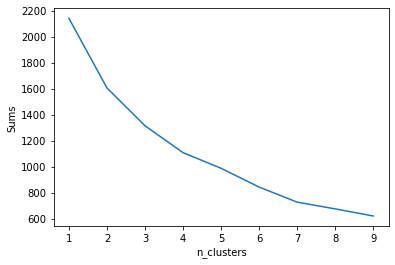

In [131]:
plt.xlabel('n_clusters')
plt.ylabel('Sums')
plt.plot(K, sums)

In [132]:
from yellowbrick.cluster import KElbowVisualizer

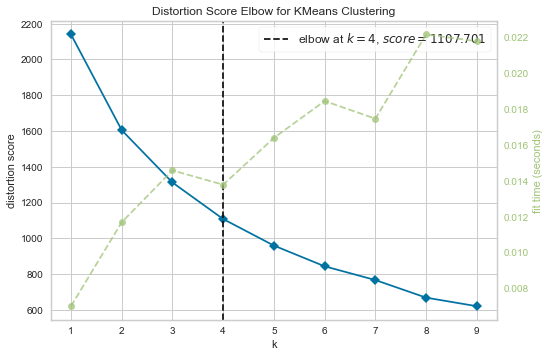

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [133]:
model_test = KMeans(init = 'random',n_init = 20)
visualizer = KElbowVisualizer(model_test, k=(1,10),locate_elbow=True)
visualizer.fit(df_test)
visualizer.show()

Why are there four clusters? Which clusters are similar?

In [134]:
model_act = KMeans(n_clusters=4)

In [135]:
model_act = model_act.fit(df_test)

In [136]:
model_act.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3,
       1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 3, 2, 1, 3, 3, 3, 1, 3, 3, 0, 0, 3, 3, 3,
       3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [137]:
labels_act= []
for pos in range(0,4):
    labels_act.append(pos)

In [138]:
labels_act

[0, 1, 2, 3]

In [139]:
df.drop(columns=['Labels'])

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [140]:
df['Labels'] = model_act.labels_

In [141]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass,Labels
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,2
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,2
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,2
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,2


In [142]:
df_glass = df.groupby(['Labels','Type of Glass']).count()

In [143]:
df_glass

RI  Na  Mg  Al  Si   K  Ca  Ba  Fe
Labels Type of Glass                                    
0      5               2   2   2   2   2   2   2   2   2
1      1              54  54  54  54  54  54  54  54  54
       2              61  61  61  61  61  61  61  61  61
       3              14  14  14  14  14  14  14  14  14
       5               2   2   2   2   2   2   2   2   2
       7               1   1   1   1   1   1   1   1   1
2      5               1   1   1   1   1   1   1   1   1
       6               6   6   6   6   6   6   6   6   6
       7              26  26  26  26  26  26  26  26  26
3      1              16  16  16  16  16  16  16  16  16
       2              15  15  15  15  15  15  15  15  15
       3               3   3   3   3   3   3   3   3   3
       5               8   8   8   8   8   8   8   8   8
       6               3   3   3   3   3   3   3   3   3
       7               2   2   2   2   2   2   2   2   2

In [144]:
arr_points

[1, 2, 3, 5, 6, 7]

In [145]:
arr_col_means = []

In [146]:
labels_act

[0, 1, 2, 3]

In [147]:
for pos in labels_act:
    arr_info = []
    for row in arr_points:
        try:
            arr_info.append(df_glass.loc[pos,row].values[0])
        except KeyError:
            arr_info.append(0)
    arr_col_means.append(arr_info)

In [148]:
df_grid = pd.DataFrame(columns=arr_points,data=arr_col_means)

In [149]:
df_grid

,1,2,3,5,6,7
0,0,0,0,2,0,0
1,54,61,14,2,0,1
2,0,0,0,1,6,26
3,16,15,3,8,3,2


Cluster 3 is similar to Cluster 5

Cluster 0 is similar to Cluster 1 and 2

Cluster 1 is similar to Cluster 6 and Cluster 7

Type of glass: (class attribute)
      1 building_windows_float_processed
      2 building_windows_non_float_processed
      3 vehicle_windows_float_processed
      4 vehicle_windows_non_float_processed (none in this database)
      5 containers
      6 tableware
      7 headlamps

In cluster 0, the model cannot differenttiate between building windows that are processed and building windows that are non-processed, however it does represent building windoows as a whole

In cluster 1, it somewhat correctly differentiates tableware and headlamp, however the fcat there are oly 214 values in a dataset and cluster 1 is producing 6 labels of tableware suggests that on a larger dataset, it would only still be somewhat accurate, not very accurate.

In cluster 2, the it is very distorted. It produces values for every single type of glass in the dataset, but the most common values are present in building windows. Like Cluster 0, it cannot differentiate between processed and non-processed glasses. Furthermore, the model also cannot see the difference between vehicle windows and building windows and in fact, every single other type of glass.

Cluster 3 produces findings that it is similar to containers.

## Silhouette Score

In [150]:
K = range(2,11)

In [151]:
from sklearn.metrics import silhouette_score

In [152]:
storek=0
storeans=0

In [153]:
arr_ans_score = []

In [154]:
for k in K:
    model_sl = KMeans(n_clusters=k)
    model_sl.fit(df)
    ans = silhouette_score(df, model_sl.labels_, metric = 'euclidean')
    if (ans > storeans):
        storeans = ans
        storek = k
    arr_ans_score.append(ans)

In [155]:
arr_ans_score

[0.5827748511197621,
 0.6023729331985659,
 0.5049648801780381,
 0.5190757183112477,
 0.5077436837208371,
 0.5149433713458098,
 0.3671231625212423,
 0.36646966989934154,
 0.36964733437796987]

In [156]:
diction_ans = {
    
}

In [157]:
for pos in range(0,len(arr_ans_score)):
    diction_ans[arr_ans_score[pos]] = pos+2

In [158]:
storeans

0.6023729331985659

In [159]:
storek

3

In [160]:
diction_ans

{0.5827748511197621: 2,
 0.6023729331985659: 3,
 0.5049648801780381: 4,
 0.5190757183112477: 5,
 0.5077436837208371: 6,
 0.5149433713458098: 7,
 0.3671231625212423: 8,
 0.36646966989934154: 9,
 0.36964733437796987: 10}

In [161]:
arr_datas = []

In [162]:
for pos in arr_ans_score:
    ar_dat = []
    ar_dat.append(pos)
    ar_dat.append(diction_ans[pos])
    arr_datas.append(ar_dat)

In [163]:
df_k_vals = pd.DataFrame(data=arr_datas,columns=['Silhouette score','K values'])

In [164]:
df_k_vals

,Silhouette score,K values
0,0.582775,2
1,0.602373,3
2,0.504965,4
3,0.519076,5
4,0.507744,6
5,0.514943,7
6,0.367123,8
7,0.366470,9
8,0.369647,10
